## Modelli di Regressione


Abbiamo un insieme di misure  $[𝑥_1,𝑥_2,...,𝑥_𝑛]$
e un output  che può essere espresso come combinazione lineare delle misure più un errore:
$ y = a_0+ \sum_{𝑗=1}^𝑛 𝑥_𝑗 a_𝑗 + e$.
Desideriamo costruire un modelle lineare che usa le misure $𝑋$ per predirre $𝑦$.

Per trovare $b$ risolviamo un problema ai minimi quadrati. In notazione matriciale: 

$ 𝑋 a= \hat y$ con $X =[1, 𝑥_1,𝑥_2,...,𝑥_𝑛]$.


e errore

### Esempio 
Abbiamo informazioni sulla qualità del vino, queste informazioni sono definite da 10 caratteristiche. I dati sono disponibili nel sito:

https://archive.ics.uci.edu/dataset/186/wine+quality

I dati sono in formato csv (comma separated values). In questo caso i dati sono separati da ;.  Possiamo caricare i dati usando il pacchetto panda: https://pandas.pydata.org  un tool open source per la manipolazione dei dati.  Per installare panda si può usare anaconda. Da linea di comando l'istruzione è: conda install -c conda-forge pandas 

In [1]:

import numpy as np
import pandas 

datay = pandas.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=";")

print(datay)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [2]:
print(len(datay))

#nomi delle colonne
datay.columns

1599


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [3]:
datay["volatile acidity"]

0       0.700
1       0.880
2       0.760
3       0.280
4       0.700
        ...  
1594    0.600
1595    0.550
1596    0.510
1597    0.645
1598    0.310
Name: volatile acidity, Length: 1599, dtype: float64

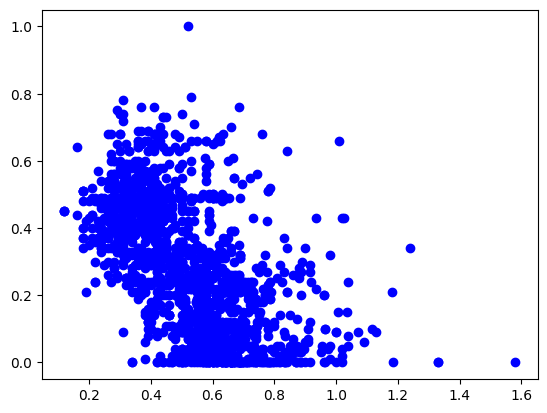

In [10]:
import matplotlib.pyplot
plt.plot(datay["volatile acidity"],datay["citric acid"],'bo')
plt.show()

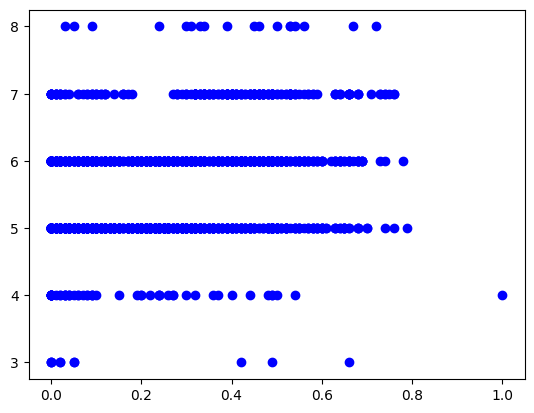

In [11]:
plt.plot(datay["citric acid"],datay["quality"],'bo')
plt.show()

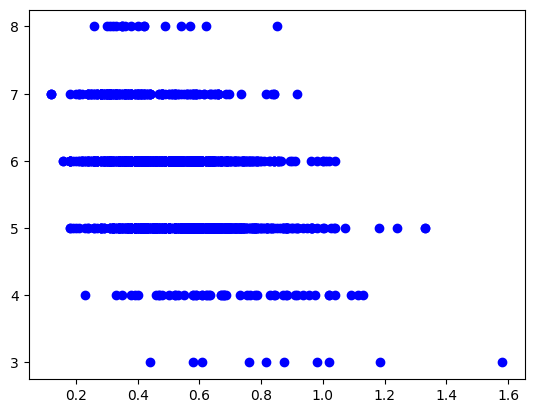

In [12]:
plt.plot(datay["volatile acidity"],datay["quality"],'bo')
plt.show()

In [13]:
Aall=datay.to_numpy() #converte il dataframe in un array numpy
print(Aall.shape)

(1599, 12)


Risolviamo il problema ai minimi quadrati

In [14]:
from sklearn.model_selection import train_test_split
X =  Aall[:,0:11] # ultimo non compreso
y = Aall[:,11]
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size = .8,
    test_size = .2,
    random_state = 5,
    shuffle = True
)

In [15]:
print(X_train.shape,y_train.shape, X_test.shape, y_test.shape)

(1279, 11) (1279,) (320, 11) (320,)


In [27]:
import scipy.linalg as las
import matplotlib.pylab as plt
nd=X_train.shape[0] # numero di dati di training (righe)
ntest = X_test.shape[0] # numero di dati di testing (righe)
index=(0,1,2,3,4,5,6,7,8,9,10) # indici delle variabili (colonne)
A = np.ones((nd,12)) # creo una matrice di tutti 1 con 12 colonne
A[:,1:12]= X_train #nelle colonne 2-12 colonne (le features) metto i dati di training (la prima colonna è tutta 1 per il termine noto)
B = np.ones((ntest,12)) #ripeto per il test
B[:,1:12] = X_test #ripeto per il test
yest = y_train   #  informazioni note 
ytopred = y_test #  questi sono i dati che dobbiamo stimare

# Risolviamo il problema ai minimi quadrati calcolando la fattorizzazione QR
# il dato di input mode="economic" calcola solo le prime colonne di Q  
# "pivoting='True'" indica che viene eseguito il pivot e gli elementi diagonali di R sono ordinati in vcalore assoluto.
#(Q,R,Pe)=las.qr(A,mode="economic",pivoting='True')  #in questo caso Q NON è ortogonale perchè è "tagliata" (Q1). Le colonne lo sono
(Q,R)=las.qr(A,mode="economic")
Pe=np.arange(0,12) #costruisco il vettore di permutazione, che in questo caso non permuta nulla



print(np.allclose(A[:, Pe], np.dot(Q, R))) #verifico che la matrice A sia uguale al prodotto QR

#permuto le colonne seguendo il vettore di permutazione. NON SCORDARTI DELLE PERMUTAZIONI

print(np.diag(R)) # stampo la diagonale di R
print(Pe)
# after we solve  

#numpy.dot e @ sono la stessa cosa. @ è piu generica e tratta meglio le matrici sparse. Ci sarebbe addirittura <nome_matrice>.dot(<altra_matrice>)


nrd=12
p=las.solve(R[0:nrd,0:nrd], np.dot(np.transpose(Q[:,0:nrd]),yest))
p=las.solve(R, np.dot(np.transpose(Q),yest))


#NEL CASO VA PERMUTATO ANCHE IL RESTO


print('TESTIAMO ORTOGONALITA\' DELLE COLONNE DI Q: ', np.linalg.norm(np.transpose(Q)@Q - np.eye(Q.shape[1]),1))

print('TESTIAMO ORTOGONALITA\' DELLE RIGHE DI Q: ', np.linalg.norm(Q@np.transpose(Q) - np.eye(Q.shape[0]),1))
#le righe non sono ortogonali. HO 1500 righe e 12 colonne. Non posso avere tutte le righe linearmente indipendenti

True
[-3.57631095e+01 -6.30493773e+01  6.28889701e+00  4.45049580e+00
  4.89080174e+01  1.68192047e+00 -3.57573901e+02 -8.29741171e+02
  4.37762798e-02  3.58990156e+00  5.30200465e+00 -2.19253064e+01]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
TESTIAMO ORTOGONALITA' DELLE COLONNE DI Q:  1.6434336530535276e-15
TESTIAMO ORTOGONALITA' DELLE RIGHE DI Q:  8.177394510552778


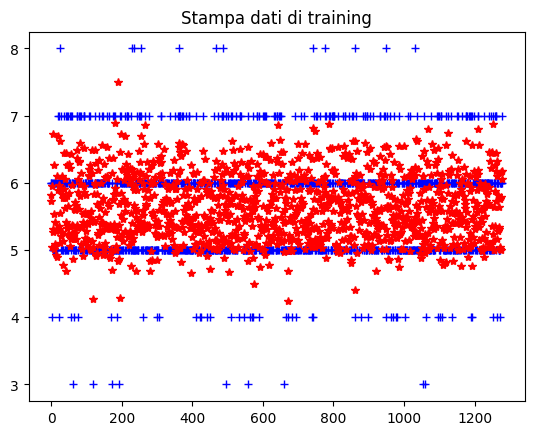

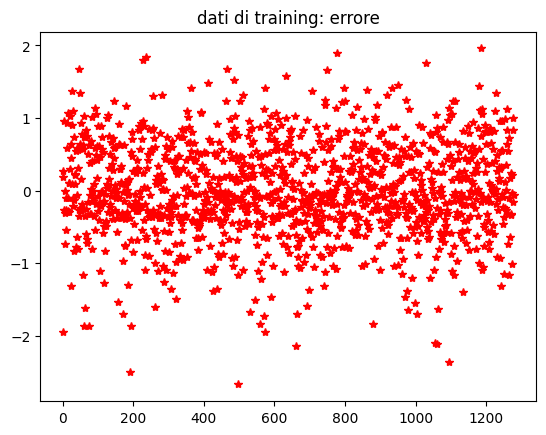

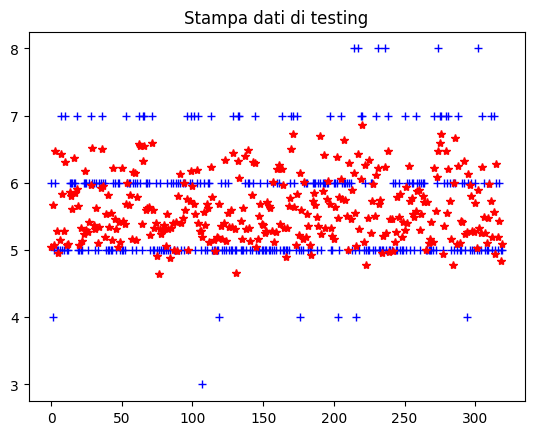

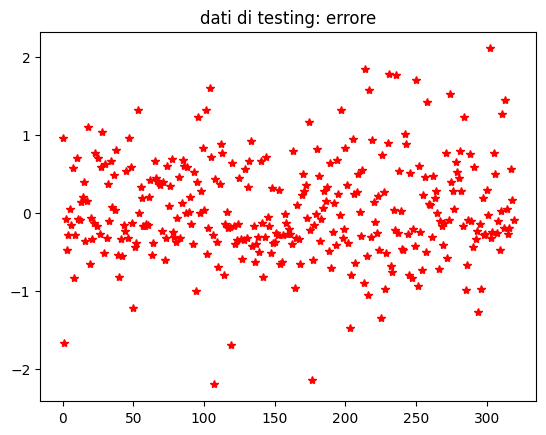

In [28]:



# Prediciamo i valori di training

#STIAMO PERMUTANDO

yr=A[:,Pe[0:nrd]]@p
x=np.arange(nd)

# we plot the results

plt.plot(x,yest,'b+', x,(yr),'r*')
plt.title('Stampa dati di training')
plt.show()
plt.plot(x,yest-(yr),'r*')
plt.title('dati di training: errore')
plt.show()

# prediciamo i valori di testing
yp =B[:,Pe[0:nrd]]@p
xp =np.arange(ntest)

# stampiamo i risultati
plt.plot(xp,ytopred,'b+', xp,(yp),'r*')
plt.title('Stampa dati di testing')
plt.show()

plt.plot(xp,ytopred-(yp),'r*')
plt.title('dati di testing: errore')
plt.show()


#se arrotondassi i valori (quindi np.round(yp)) CAMBIA DI MOLTO IL RISULTATO (questo perchè il task è di classificazione e non di regressione). Però alcune classi non sono mai predette bene

In [30]:
np.sum((ytopred-np.round(yp))==0)

#vedo quanti ho azzeccato al 100% nel testing

200

In [32]:
# Controlliamo le percentuali di errore
num = np.zeros((7,1))
lp = np.shape(ytopred)[0]
for i in range(-3,4):  
    num[i] = np.sum( (ytopred-np.round(yp)) == np.real(i))
    print(i,num[i],num[i]/lp)   


#vedo quanti sono stati predetti con errore -3, -2, -1, 0, 1, 2, 3

-3 [0.] [0.]
-2 [4.] [0.0125]
-1 [44.] [0.1375]
0 [200.] [0.625]
1 [64.] [0.2]
2 [8.] [0.025]
3 [0.] [0.]


X [   0    1    2 ... 1276 1277 1278]


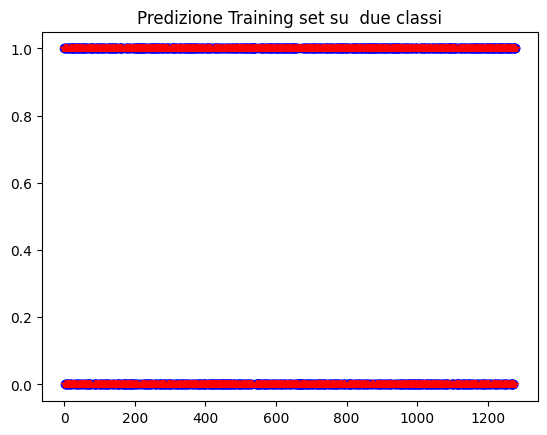

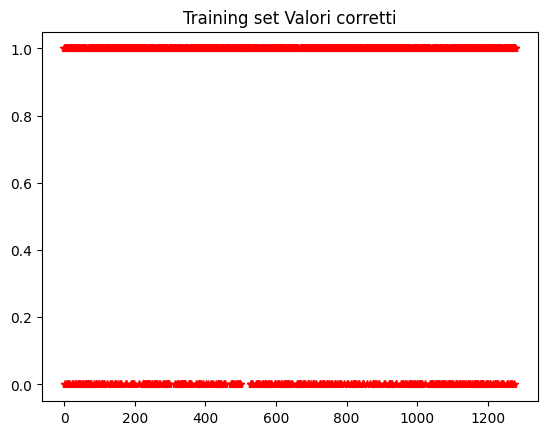

Training set Valori corretti 0.7372947615324472


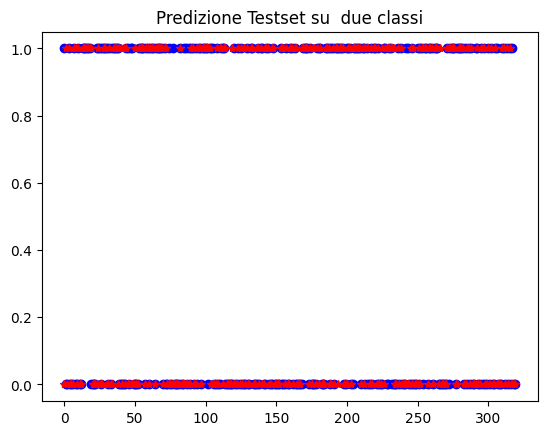

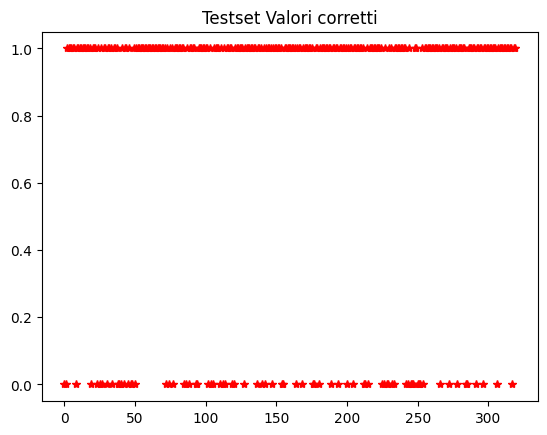

Testset set Valori corretti 0.7625


In [34]:
# facciamo la suddivisone in due classe
yesttwo = (yest >= 5.5)
ytopredtwo = (ytopred >=5.5)

x=np.arange(nd)
yrtwo = ( yr>=5.5 )

# we plot the results
plt.plot(x,yesttwo,'bo', x, yrtwo,'r*')
plt.title('Predizione Training set su  due classi')
plt.show()
plt.plot(x,yesttwo==yrtwo,'r*')
plt.title('Training set Valori corretti')
plt.show()
# numero di classi giuste
print('Training set Valori corretti',np.sum(yesttwo==yrtwo)/np.shape(yesttwo)[0])


xp =np.arange(ntest)
yptwo=(yp>=5.5)


# we plot the results
plt.plot(xp,ytopredtwo,'bo', xp,yptwo,'r*')
plt.title('Predizione Testset su  due classi')
plt.show()

plt.plot(xp,ytopredtwo==(yptwo),'r*')
plt.title('Testset Valori corretti')
plt.show()

print('Testset set Valori corretti',np.sum(ytopredtwo==(yptwo))/np.shape(yptwo)[0])


In [39]:
print ('condition number of  A:', np.linalg.cond(A)) #norma di A * norma inversa di A (se la matrice è rettangolare, ci sono altre strategie)
print ('condition number of  R:', np.linalg.cond(R))
ATA = A.T.dot(A)
print ('condition number of  A\'A:', np.linalg.cond(ATA))
print ('condition number of  R\'R:', np.linalg.cond(R.T.dot(R)))


print("condition rumber of R^2: ", np.linalg.cond(R)**2)       #possiamo vedere come ATA è quadrato

condition number of  A: 110984.12527116873
condition number of  R: 110984.12527116873
condition number of  A'A: 12317476083.219923
condition number of  R'R: 12317476436.449217
condition rumber of R^2:  12317476062.206472


In [40]:
# least square solution scipy
# lapack_driver = 'gelsd', 'gelsy', 'gelss'
import scipy as sp
import scipy.linalg as spla


betaS, residualsS, rankS, svS = spla.lstsq(A, yest,lapack_driver='gelss')   #metodo di scipy per risolvere i minimi quadrati
#INPUT: matrice A, vettore y, lapack_driver (metodo di risoluzione)



print ( 'beta:')
print(betaS)
print ('residuals:', residualsS)
print ('rank:', rankS)
print ('singular values:', svS)
print(p)
print(Pe)
print(betaS[Pe])

beta:
[ 2.51415881e+01  3.16451740e-02 -1.13297028e+00 -1.29162767e-01
  2.98498911e-02 -1.94941143e+00  2.85043937e-03 -2.85137633e-03
 -2.10144416e+01 -3.77024486e-01  9.04017724e-01  2.53185189e-01]
residuals: 539.4036297221744
rank: 12
singular values: [2.14844734e+03 3.35796102e+02 2.31596175e+02 5.57998925e+01
 4.72835334e+01 1.26777705e+01 6.93911826e+00 5.39533179e+00
 3.71645733e+00 1.59485763e+00 1.17204639e+00 1.93581500e-02]
[ 2.51415881e+01  3.16451740e-02 -1.13297028e+00 -1.29162767e-01
  2.98498911e-02 -1.94941143e+00  2.85043937e-03 -2.85137633e-03
 -2.10144416e+01 -3.77024486e-01  9.04017724e-01  2.53185189e-01]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 2.51415881e+01  3.16451740e-02 -1.13297028e+00 -1.29162767e-01
  2.98498911e-02 -1.94941143e+00  2.85043937e-03 -2.85137633e-03
 -2.10144416e+01 -3.77024486e-01  9.04017724e-01  2.53185189e-01]


## Conditioning of least squares problems

In [96]:
import numpy as np
A = np.array([(1, 1000), (0.00099, 1)])
A

array([[1.0e+00, 1.0e+03],
       [9.9e-04, 1.0e+00]])

In [97]:
# condition number of  A and  A'A

print ('condition number of  A:', np.linalg.cond(A))
ATA = A.T.dot(A)
print ('condition number of  A\'A:', np.linalg.cond(ATA))


condition number of  A: 100000200.00009874
condition number of  A'A: 1.0010673925908428e+16


In [98]:
# two collinear predictors 
tmp = np.arange(100)
A = np.zeros((100, 2))
A[:, 0] = tmp + np.random.rand(100) * 0.000001
A[:, 1] = tmp + np.random.rand(100) * 0.000001
ATA = A.T.dot(A)
print ('condition number of   A\'A  for the simulating data :', np.linalg.cond(ATA))

print ('condition number of   A for the simulating data :',np.linalg.cond(A) )

U, s, V = np.linalg.svd(A)
print ('singular values :',s, 'smax/smin : ', s[0]/s[1] )
     

condition number of   A'A  for the simulating data : 1.0985557274842546e+16
condition number of   A for the simulating data : 301783260.2896723
singular values : [8.10370292e+02 2.68527251e-06] smax/smin :  301783260.28967226


In [ ]:
A=np.array([[1, 0],
[1, 1],
[1, 1]])
# we construct a matrix B with  one column almost linear combination of the column of A
B=np.zeros((3,3))
B[:,0:2]=A
B[:,2:3]= np.dot(A, np.array([[1],[0.5]]))+1e-7*np.random.randn(3,1)
print('B = ')
print(B)

B = 
[[1.         0.         0.99999986]
 [1.         1.         1.49999991]
 [1.         1.         1.49999999]]


In [ ]:
import scipy as sp
# we introduce a random error  and we compute b as B times a vector of all 1 + an error
b=np.dot(B,np.array([[1],[1],[1]]))+1e-6*np.random.randn(3,1)
# the matrix is non singular so we can solve the system 

x = sp.linalg.solve(B, b)
print('solution of the square linear system')
print(x)

solution of the square linear system
[[-0.41585865]
 [ 0.29207173]
 [ 2.41585754]]


In [ ]:
resn = np.linalg.norm(B.dot(x)-b,2)/np.linalg.norm(b,2) 
print('residual',resn)

residual 4.159277691651984e-17


In [ ]:
condB= np.linalg.cond(B) 
print ('condition number of   B  :',condB )


condition number of   B  : 85498649.38303861


In [ ]:
# the error is bounded by
print(' the error is bounded by', condB*resn/np.linalg.norm(b))

 the error is bounded by 6.661236640808643e-10


In [ ]:
# least square solution scipy
# lapack_driver = 'gelsd', 'gelsy', 'gelss'
# https://www.netlib.org/lapack/explore-html/d4/ddf/group__gels__driver__grp.html
import scipy as sp
import scipy.linalg as spla
betaS, residualsS, rankS, svS = spla.lstsq(B, b,lapack_driver='gelsd')
print ( 'beta:')
print(betaS)
print ('residuals:', residualsS)
print ('rank:', rankS)
print ('singular values:', svS)

beta:
[[-0.41585865]
 [ 0.29207172]
 [ 2.41585755]]
residuals: []
rank: 3
singular values: [3.17054296e+00 6.69071603e-01 3.70829595e-08]


In [ ]:
# the residual is small,has the same order of the error in the data, the data have a better meaning
#
resn = np.linalg.norm(B.dot(xT)-b,2)/np.linalg.norm(b,2) 
print(resn)

1.2436985880103733e-08


### Esempio di approsimazione ai minimi quadrati con polinomi

Populating the interactive namespace from numpy and matplotlib
        x      y.yesterday    y.tomorrow
0          0.5000000 0.4269584 0.4468527
1          0.5862069 0.4841696 0.4769383
2          0.6724138 0.4957393 0.5109149
3          0.7586207 0.5438164 0.5130406
4          0.8448276 0.5379404 0.5231111
5          0.9310345 0.5375140 0.5526467
6          1.0172414 0.5401231 0.5371602
7          1.1034483 0.5447002 0.5485324
8          1.1896552 0.5453667 0.5446904
9          1.2758621 0.5337212 0.5325971
10         1.3620690 0.5360551 0.5432252
11         1.4482759 0.5482129 0.5316430
12         1.5344828 0.5277309 0.5189950
13         1.6206897 0.5032543 0.5243238
14         1.7068966 0.5094058 0.5277170
15         1.7931034 0.5049205 0.5028689
16         1.8793103 0.5224972 0.5274091
17         1.9655172 0.5278002 0.5019069
18         2.0517241 0.5249105 0.5037381
19         2.1379310 0.5106958 0.5030663
20         2.2241379 0.5027985 0.4993774
21         2.3103448 0.4895309 0.51

/Users/frances/opt/anaconda3/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


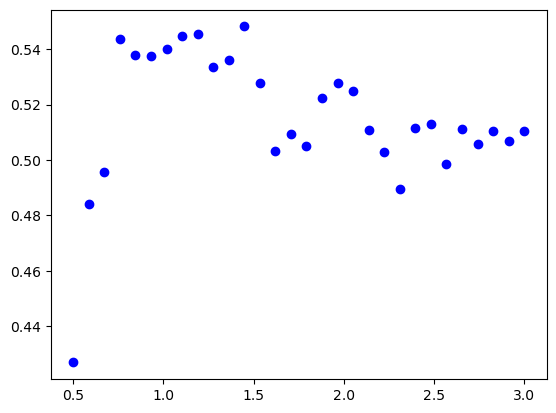

In [107]:
%pylab inline
import numpy as np
#import urllib.request as ur

#url = 'http://azzalini.stat.unipd.it/Book-DM/yesterday.dat'   # does not work 
#u = ur.urlopen(url)
#localFile = open('yesterday.csv', 'w')
#data = u.read()
#localFile.write(data.decode('utf-8'))
#localFile.close()
import pandas
datayP = pandas.read_csv('yesterday.csv')
print(datayP)

datay = np.genfromtxt('yesterday.csv',delimiter=' ',skip_header=1,usecols=(0,1,2)) 
plot(datay[:,0],datay[:,1],'bo')
show()

(30, 5)


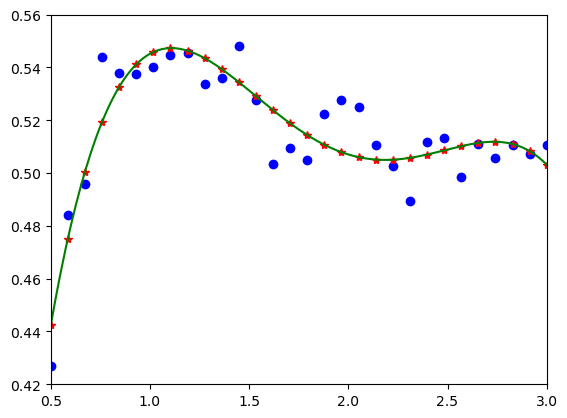

In [108]:
x = datay[:,0]
yest = datay[:,1] #  given information
ytom = datay[:,2]  # tomorrow values

(nx,) =x.shape
xmin = min(x) 
xmax = max(x)
xx = np.linspace(xmin,xmax,200) # points used for evaluation
mp=5
import scipy.linalg as las
A=np.vander(x,mp)
print(A.shape)

#A=np.zeros([nx,mp])
# Vandermonde matrix,  we look for a polynomial of degree mp-1 that better approximate the data
#A[:,0] = 1
#for j in range(1,mp):
#    A[:,j]=A[:,j-1]*x
#A1=A[:,::-1])
# we solve the least-squares problem by first computing the QR factorization, the economic mode compute only the first mp column of Q
(Q,R)=las.qr(A,mode='economic')
# after we solve the two linear systems 
p=las.solve(R, np.dot(np.transpose(Q),yest))
# A x = Q R x = b
# Q^T Q R x = Q^T b 
# R x = Q^T b 
# we evaluate the polynomial in x and xx
yr=np.polyval(p,x)
yc=np.polyval(p,xx)

# we plot the results
plot(x,yest,'bo', x,yr,'r*',xx,yc,'g-')
axis([xmin,xmax,0.42,0.56])
show()

In [ ]:
# least square solution scipy
# lapack_driver = 'gelsd', 'gelsy', 'gelss'
# https://www.netlib.org/lapack/explore-html/d4/ddf/group__gels__driver__grp.html
import scipy as sp
import scipy.linalg as spla
betaS, residualsS, rankS, svS = spla.lstsq(A, yest,lapack_driver='gelsy')
print ( 'beta:')
print(betaS)
print ('residuals:', residualsS)
print ('rank:', rankS)
print ('singular values:', svS)

In [109]:
#Least square solition with pytorch
import torch

# An open source machine learning framework that accelerates the path from research prototyping to production deployment.
AT = torch.tensor(A,dtype=torch.float64)
bT = torch.tensor(yest,dtype=torch.float64)
# driver chooses the LAPACK/MAGMA function that will be used. For CPU inputs the valid values are ‘gels’, ‘gelsy’, ‘gelsd', ‘gelss’.
# For CUDA input, the only valid driver is ‘gels’, which assumes that A is full-rank. 
# https://pytorch.org/docs/stable/generated/torch.linalg.lstsq.html#torch.linalg.lstsq
X = torch.linalg.lstsq(AT, bT)
print(X.solution)
print(torch.tensor(p)-X.solution)
print(X.rank)
print(X.residuals)
print(X.singular_values)

tensor([-0.0467,  0.3757, -1.0687,  1.2389,  0.0459], dtype=torch.float64)
tensor([-2.1511e-16,  1.4988e-15, -4.6629e-15,  6.8834e-15, -3.5805e-15],
       dtype=torch.float64)
tensor(5)
tensor([], dtype=torch.float64)
tensor([], dtype=torch.float64)


In [110]:
#Least square solition with tensorflow
#https://www.tensorflow.org/api_docs/python/tf/linalg/lstsq
import tensorflow as tf
yest=yest.reshape(30,1)
ATF = tf.constant(A,dtype=tf.float64)
bTF = tf.constant(yest,dtype=tf.float64)
XTF = tf.linalg.lstsq(ATF, bTF)
print(XTF)
print(tf.linalg.adjoint(XTF)-tf.constant(p))

tf.Tensor(
[[-0.04674372]
 [ 0.37572645]
 [-1.06865916]
 [ 1.2389301 ]
 [ 0.04592347]], shape=(5, 1), dtype=float64)
tf.Tensor(
[[-3.33047478e-12  2.36609066e-11 -5.83109117e-11  5.77575765e-11
  -1.88377647e-11]], shape=(1, 5), dtype=float64)


2024-03-27 21:54:50.305402: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
